<a href="https://colab.research.google.com/github/griffinsykes/Portfolio/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

attr = pd.read_csv('/content/sample_data/attrition.csv')
attr.head()

Mounted at /content/drive


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41.0,No,Travel_Rarely,1102.0,Cardiology,1.0,2.0,Life Sciences,2.0,...,1.0,80.0,NaN,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,1200302,49.0,No,Travel_Frequently,279.0,Maternity,8.0,1.0,Life Sciences,3.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,1060315,37.0,Yes,Travel_Rarely,1373.0,Maternity,2.0,NaN,Other,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,1272912,33.0,No,Travel_Frequently,1392.0,Maternity,3.0,4.0,Life Sciences,4.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,1414939,27.0,No,Travel_Rarely,591.0,Maternity,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,NaN,3.0,3.0,2.0,NaN,NaN,2.0


In [ ]:
attr.shape

(1676, 34)

In [ ]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1676 non-null   int64  
 1   Age                       1508 non-null   float64
 2   Attrition                 1676 non-null   object 
 3   BusinessTravel            1676 non-null   object 
 4   DailyRate                 1508 non-null   float64
 5   Department                1676 non-null   object 
 6   DistanceFromHome          1508 non-null   float64
 7   Education                 1508 non-null   float64
 8   EducationField            1676 non-null   object 
 9   EnvironmentSatisfaction   1508 non-null   float64
 10  Gender                    1676 non-null   object 
 11  HourlyRate                1508 non-null   float64
 12  JobInvolvement            1508 non-null   float64
 13  JobLevel                  1508 non-null   float64
 14  JobRole 

In [ ]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(attr, test_size=0.2) #test_size=0.2 means that 20% of data will be for testing, 80% for training
traindata.shape, testdata.shape

((1340, 34), (336, 34))

In [ ]:
traindata.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.340000e+03,1210.000000,1208.000000,1199.000000,1215.000000,1207.000000,1212.000000,1207.000000,1210.000000,1209.000000,...,1210.000000,1198.0,1213.000000,1214.000000,1207.000000,1199.000000,1208.000000,1199.000000,1204.000000,1212.000000
mean,1.459524e+06,36.899174,813.753311,9.143453,2.892181,2.681856,65.798680,2.731566,2.076860,2.741935,...,2.706612,80.0,0.786480,11.462109,2.831814,2.760634,7.096026,4.294412,2.219269,4.207096
std,2.495223e+05,9.018669,399.098388,8.138068,1.009378,1.096441,20.253409,0.717599,1.126364,1.096157,...,1.076421,0.0,0.842213,7.844835,1.288699,0.707875,6.133077,3.671970,3.218829,3.539679
min,1.026798e+06,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235371e+06,30.000000,488.250000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.470887e+06,36.000000,813.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.673107e+06,43.000000,1171.250000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


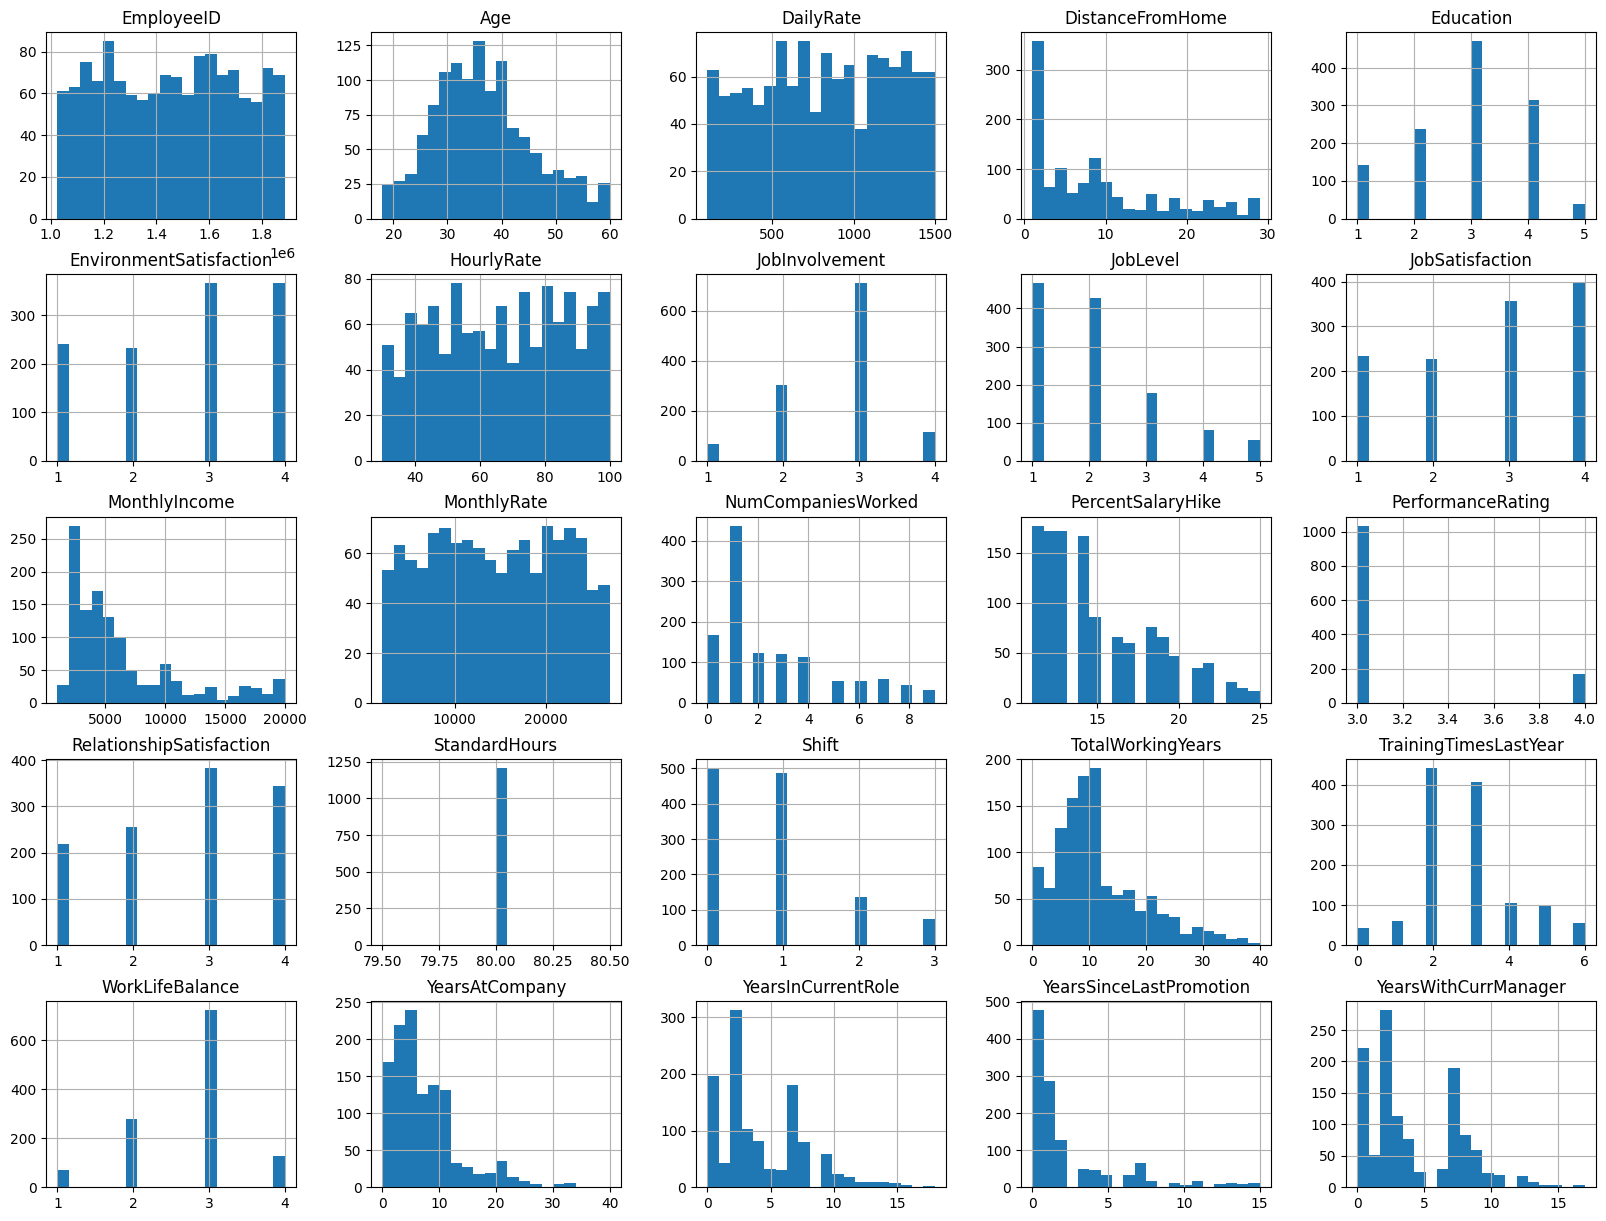

In [ ]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
num_cols = [column for column in attr.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols.remove('EmployeeID')

num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'Shift',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

NameError: name 'plt' is not defined

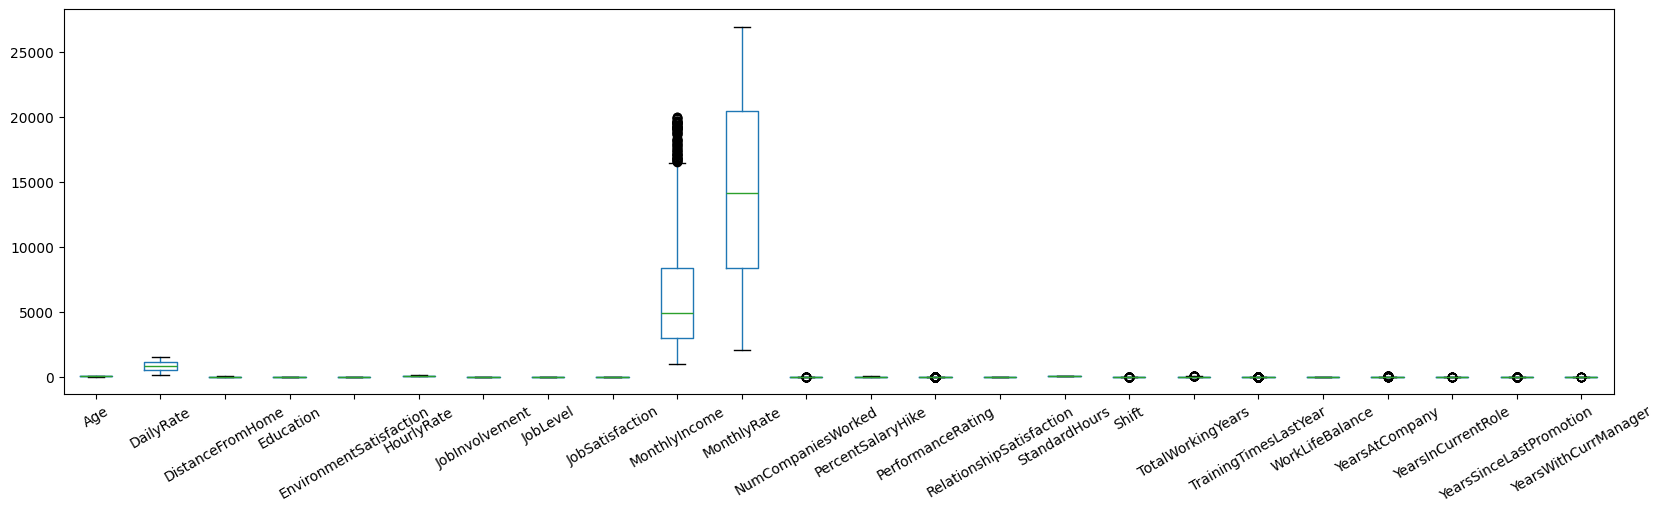

In [ ]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

In [ ]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

NameError: name 'cat_cols' is not defined

In [ ]:
num_cols = ['Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
            'JobLevel', 'JobSatisfaction',  'MonthlyRate',  'PerformanceRating', 'RelationshipSatisfaction',
            'StandardHours', 'Shift', 'TrainingTimesLastYear', 'WorkLifeBalance']                                             #this list is for symmetric numeric columns
log_cols = ['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
            'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']   #this list is for skewed numeric columns
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']               #this list for the class columns
target = 'Attrition'                                                                                                          #this is the name of the target

In [ ]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [ ]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['Age', 'DailyRate', 'Education',
                                  'EnvironmentSatisfaction', 'HourlyRate',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyRate',
                                  'PerformanceRating',
                                  'RelationshipSatisfaction', 'StandardHours',
                                  'Shift', 'TrainingTi...
                                 ['DistanceFromHome', 'MonthlyIncome',
                                  'NumCompaniesWorked', 'PercentSalaryHike',
                                  'TotalWorkingYears', 'YearsAtCompany',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'Gender', 'JobRole',
                                  'MaritalStatus', 'OverTime'])])

<h4>Logistic Regression</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',LogisticRegression())
])

logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyRate',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'Stan...
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('modeling', LogisticRegression())])

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)

from sklearn.metrics import accuracy_score
accuracy_score(traindata[target], logistic_pred)

0.9335820895522388

<h4>Decision Tree</h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',DecisionTreeClassifier())
])

tree_pipeline.fit(traindata, traindata[target])

In [ ]:
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
accuracy_score(testdata[target], tree_pred_test)

<h4>Random Forest</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',RandomForestClassifier())
])

forest_pipeline.fit(traindata, traindata[target])

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
accuracy_score(testdata[target], forest_pred_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=10000)
param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling', grid_search)
])

logistic_pipeline.fit(traindata, traindata[target])

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
accuracy_score(traindata[target], logistic_pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200]
}]

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling tree', grid_search)
])

tree_pipeline.fit(traindata, traindata[target])

In [ ]:
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200],
    'n_estimators': [5, 10, 20, 50]
}]

forest = RandomForestClassifier()

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', return_train_score=True)

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling forest', grid_search)
])

forest_pipeline.fit(traindata, traindata[target])

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
accuracy_score(testdata[target], logistic_pred_test)

0.9464285714285714

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
accuracy_score(testdata[target], tree_pred_test)

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
accuracy_score(testdata[target], forest_pred_test)